In [1]:
from math import sqrt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression, LassoCV, Ridge
from sklearn.svm import LinearSVR

In [2]:
train = pd.read_csv('Train_.csv', index_col = 0)
test = pd.read_csv('Test_.csv', index_col = 0)

train.head()

,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,id,BODYFAT
0,-1.765809,-0.889567,-1.038592,-0.472561,-0.767813,-0.918018,-0.692469,-0.829612,-0.073241,-0.541853,-0.829714,-0.093307,-0.687456,-1.242080,1,12.6
1,-1.850761,-0.175317,0.677603,-0.573171,0.264654,-0.852900,-0.925639,-0.143476,-0.134080,-0.541853,0.295346,-0.606281,0.108369,0.015275,2,6.9
2,-1.850761,-0.898965,-1.610657,-0.137193,-1.755391,-0.566381,-0.406305,-0.061793,0.048439,0.177240,0.745371,-1.187651,-1.854665,-1.813605,3,24.6
3,-1.510954,0.256992,0.677603,-0.070119,-0.229134,0.215035,-0.565285,0.264939,0.149838,-0.541853,-0.154678,0.043486,0.373644,0.015275,4,10.9
4,-1.680858,0.238196,0.296226,0.164639,-1.575831,-0.371027,0.876129,0.379295,0.778515,1.660369,0.745371,-0.024910,-0.528291,-0.556250,5,27.8


In [3]:
y_true = test.iloc[:, -1].tolist()

def model_performance(y_pred, y_true, y_est, y_train):
    
    print("training rsme:", sqrt(mean_squared_error(y_train, y_est)))
    print("testing rmse:", sqrt(mean_squared_error(y_true, y_pred)))
    print("training r2 score:", r2_score(y_train, y_est))
    print("testing r2 score:", r2_score(y_true, y_pred))

In [4]:
# baseline: linear ~ height + weight

baseline = LinearRegression().fit(train.iloc[:, 1:3], train.iloc[:, -1])
y_pred_base = baseline.predict(test.iloc[:, 1:3])
y_est_base = baseline.predict(train.iloc[:, 1:3])

model_performance(y_pred_base, y_true, y_est_base, train.iloc[:, -1].tolist())

training rsme: 5.479893732098216
testing rmse: 5.046166946542161
training r2 score: 0.4445394257402022
testing r2 score: 0.5154455024411131


In [5]:
# ridge regression: all features

clf1 = Ridge(random_state=168).fit(train.iloc[:, :-2], train.iloc[:, -1])
y_pred_1 = clf1.predict(test.iloc[:, :-2])
y_est_1 = clf1.predict(train.iloc[:, :-2])

model_performance(y_pred_1, y_true, y_est_1, train.iloc[:, -1].tolist())

training rsme: 4.2353918914216475
testing rmse: 4.372026807811751
training r2 score: 0.6681848834871332
testing r2 score: 0.6362650504328229


In [6]:
# select features using lasso

lasso = LassoCV(cv=5, random_state=168).fit(train.iloc[:, :-2], train.iloc[:, -1])

dic = {'feat': list(train.columns)[:-2], 'coef':lasso.coef_}
coef = pd.DataFrame(dic)
coef['abs_coef'] = abs(lasso.coef_)
coef.sort_values(by = 'abs_coef', ascending=False)

,feat,coef,abs_coef
6,ABDOMEN,7.049554,7.049554
5,CHEST,-1.645838,1.645838
1,WEIGHT,1.346967,1.346967
13,WRIST,-1.300665,1.300665
7,HIP,-1.264676,1.264676
8,THIGH,0.806447,0.806447
0,AGE,0.802525,0.802525
4,NECK,-0.579648,0.579648
2,HEIGHT,-0.539520,0.539520
11,BICEPS,0.464194,0.464194


In [7]:
# lassoCV: selected features

clf2 = LassoCV(cv=5, random_state=168).fit(train[['ABDOMEN', 'CHEST', 'WEIGHT', 'HIP', 'THIGH', 'AGE']], train.iloc[:, -1])
y_pred_2 = clf2.predict(test[['ABDOMEN',  'CHEST', 'WEIGHT',  'HIP', 'THIGH', 'AGE']])
y_est_2 = clf2.predict(train[['ABDOMEN',  'CHEST', 'WEIGHT', 'HIP', 'THIGH', 'AGE']])

model_performance(y_pred_2, y_true, y_est_2, train.iloc[:, -1].tolist())

training rsme: 4.4722354493625796
testing rmse: 4.356762595015797
training r2 score: 0.6300370062353107
testing r2 score: 0.6388004582629603


In [8]:
clf2.coef_

array([ 8.28609069, -2.212752  , -0.        , -2.33188985,  1.59824911,
        0.43483765])

In [9]:
clf2.intercept_

18.49107562754811

In [10]:
# SVMregression with selected features

clf_svm = LinearSVR(random_state = 168, tol=1e-5).fit(train[['ABDOMEN', 'CHEST', 'HIP', 'THIGH', 'AGE']], train.iloc[:, -1])
y_pred_svm = clf_svm.predict(test[['ABDOMEN', 'CHEST', 'HIP', 'THIGH', 'AGE']])
y_est_svm = clf_svm.predict(train[['ABDOMEN', 'CHEST', 'HIP', 'THIGH', 'AGE']])

model_performance(y_pred_svm, y_true, y_est_svm, train.iloc[:, -1].tolist())

training rsme: 4.594039267391938
testing rmse: 4.442865371831435
training r2 score: 0.6096102812469202
testing r2 score: 0.6243825961132723


continue with clf2, diagnosis

In [11]:
# Residual diagnosis
et = [(y_true[i] - y_pred_2[i]) for i in range(len(y_true))]
print(max(et), min(et))

9.244438624765243 -17.766303837836297


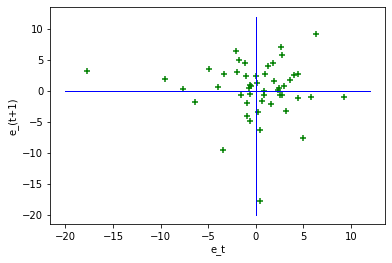

In [12]:
plt.figure(figsize = (6, 4))
plt.plot([-20,12],[0,0],'b',linewidth=1)
plt.plot([0,0],[-20,12],'b',linewidth=1)
et_1 = et[1:]
et_0 = et[:-1]
plt.scatter(et_0, et_1, marker = '+', color = 'g')
plt.xlabel('e_t')
plt.ylabel('e_(t+1)')
plt.savefig('image/residual.png', bbox_inches='tight')

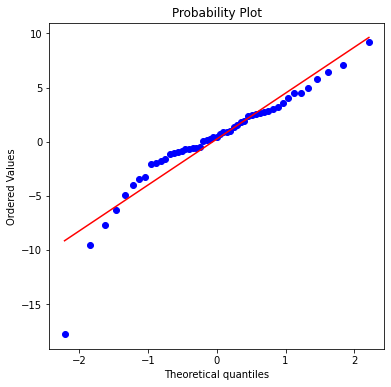

In [13]:
plt.figure(figsize = (6, 6))
stats.probplot(et, dist = 'norm', plot = plt)    
plt.savefig('image/Q_Q.png', bbox_inches='tight')

residual std: 4.350356623310738


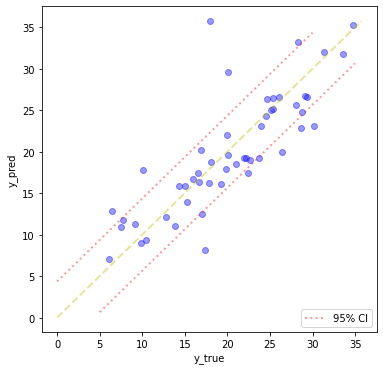

In [14]:
sd = np.std(et)
x = list(range(0, 40, 5))
y1 = [x_+sd for x_ in x]
y2 = [0] + [x_-sd for x_ in x[1:]]

plt.figure(figsize = (6, 6))
plt.scatter(y_true, y_pred_2, c = 'blue', alpha = 0.4)
plt.xlabel('y_true')
plt.ylabel('y_pred')
plt.plot([0, max(y_true + y_pred_2.tolist())], [0, max(y_true + y_pred_2.tolist())], linestyle='--', lw=2, color='y', alpha = 0.4)
l1, = plt.plot([x[0], x[-2]], [y1[0], y1[-2]], linestyle=':', lw=2, color='r', alpha = 0.4)
l2, = plt.plot([x[1], x[-1]], [y2[1], y2[-1]], linestyle=':', lw=2, color='r', alpha = 0.4)
plt.legend([l1, l2], ['95% CI'], loc='lower right')
plt.savefig('image/pred.png', bbox_inches='tight')
print('residual std:', sd)

In [15]:
dic = {'abs_et': [abs(e) for e in et], 'y_test': y_true, 'y_pred':y_pred_2, 'IDNO': test['id'].tolist()}
result = pd.DataFrame(dic)
result.head()

,abs_et,y_test,y_pred,IDNO
0,0.877531,16.5,17.377531,154
1,1.982855,20.0,21.982855,168
2,3.022188,22.2,19.177812,132
3,0.871433,9.9,9.028567,151
4,0.619258,34.7,35.319258,169


In [16]:
df = pd.read_csv('BodyFat.csv')
df.head()

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,1,12.6,1.0708,23,154.25,67.75,23.7,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,2,6.9,1.0853,22,173.25,72.25,23.4,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,3,24.6,1.0414,22,154.00,66.25,24.7,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,4,10.9,1.0751,26,184.75,72.25,24.9,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,5,27.8,1.0340,24,184.25,71.25,25.6,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [17]:
result = pd.merge(result, df, how='inner', on='IDNO')
result = result.sort_values(by = 'abs_et', ascending = False)
#result.to_csv('result.csv', index = False)
result.head(6)

,abs_et,y_test,y_pred,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
29,17.766304,17.976908,35.743212,216,45.1,0.9950,51,219.00,64.00,37.6,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4
17,9.547901,20.100000,29.647901,140,20.1,1.0522,49,212.75,75.00,26.6,40.8,104.7,106.6,107.7,66.5,42.5,24.5,35.5,29.8,18.7
22,9.244439,17.400000,8.155561,128,17.4,1.0590,43,152.25,67.75,23.4,37.5,95.9,78.0,93.2,53.5,35.8,20.8,33.9,28.2,17.4
14,7.688896,10.100000,17.788896,97,10.1,1.0770,38,188.75,73.25,24.8,37.5,99.1,91.6,102.4,60.6,39.4,22.9,31.6,30.1,18.5
50,7.108769,30.200000,23.091231,81,30.2,1.0283,67,163.75,67.75,25.1,38.4,97.7,95.8,97.1,54.8,38.2,23.7,29.4,27.2,19.0
21,6.390843,26.400000,20.009157,127,26.4,1.0373,42,177.50,68.75,26.4,38.9,98.7,92.1,98.5,60.7,36.8,22.2,33.8,30.3,17.2


In [19]:
r = result[['abs_et', 'y_test', 'y_pred']]
abs_et = [abs(e) for e in et]
perc = [abs_et[i]/y_true[i]*100 for i in range(len(y_true))]
r['percent'] = perc
r

/tmp/ipykernel_367984/468261559.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r['percent'] = perc


,abs_et,y_test,y_pred,percent
29,17.766304,17.976908,35.743212,5.318370
17,9.547901,20.100000,29.647901,9.914275
22,9.244439,17.400000,8.155561,13.613458
14,7.688896,10.100000,17.788896,8.802349
50,7.108769,30.200000,23.091231,1.784606
21,6.390843,26.400000,20.009157,9.705128
11,6.339988,6.500000,12.839988,12.559711
7,5.795211,28.600000,22.804789,20.262976
13,4.998052,22.400000,17.401948,16.577328
43,4.932557,28.300000,33.232557,11.747194


In [21]:
print(r[r['percent'] <= 3].shape[0]/r.shape[0]*100) #3%
print(r[r['percent'] <= 5].shape[0]/r.shape[0]*100) #5%
print(r[r['percent'] <= 10].shape[0]/r.shape[0]*100) #10%

15.686274509803921
23.52941176470588
50.98039215686274
